In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import seaborn as sns
from sklearn.decomposition import PCA



In [2]:
# Load the dataset
df = pd.read_csv("Mall_Customers.csv")

# Drop the 'CustomerID' column (not relevant for clustering)
df = df.drop(columns=['CustomerID'])

In [11]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [3]:
# Select relevant features
features = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

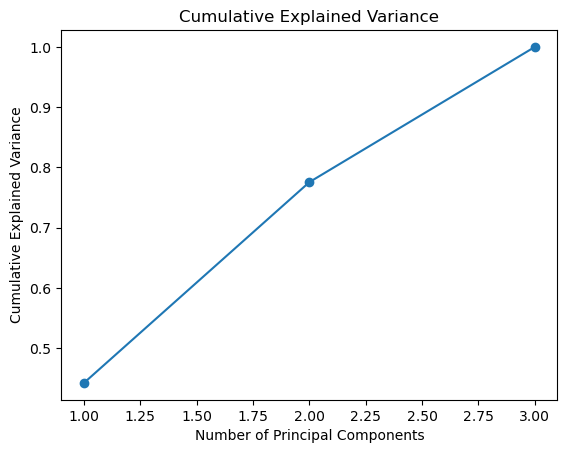

In [4]:
# Standardize the features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

# Apply PCA
pca = PCA()
pca.fit(features_standardized)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_variance = explained_variance_ratio.cumsum()

# Plot explained variance
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance, marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()


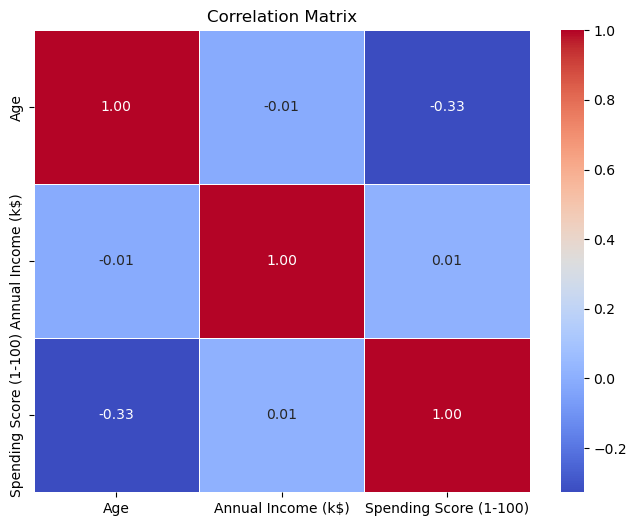

In [9]:
#If features are highly correlated, they might contain redundant information. 
#In such cases, you could consider excluding one of the correlated features.
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

C:\Users\Zooby\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


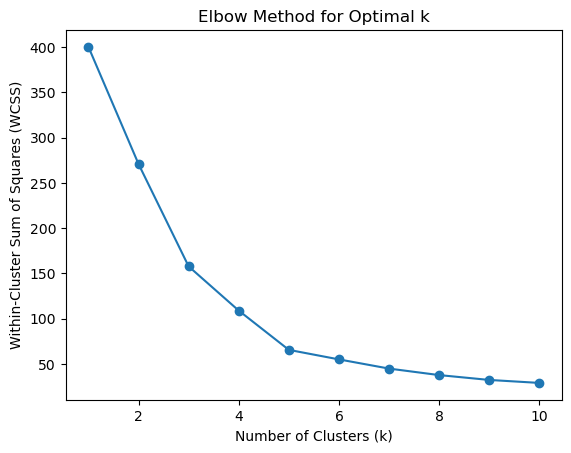

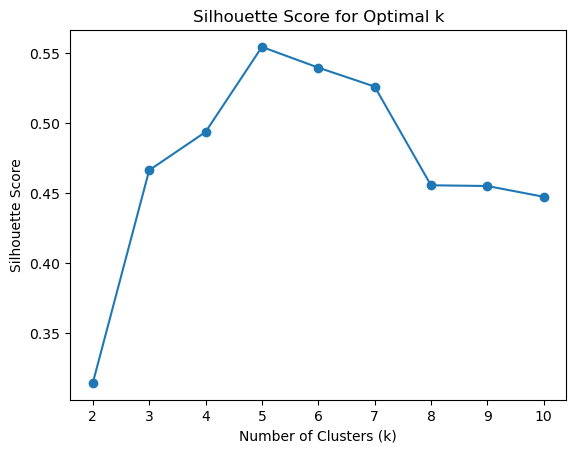

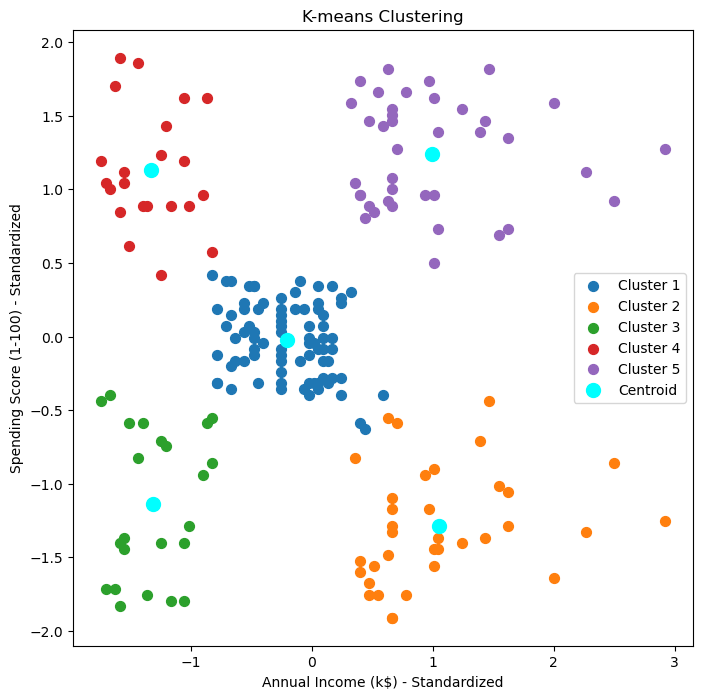

In [10]:
#removing age since it is the only correlated value
features = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

# Determine the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features_standardized)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

# Determine the optimal number of clusters using silhouette score
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    labels = kmeans.fit_predict(features_standardized)
    silhouette_scores.append(silhouette_score(features_standardized, labels))

# Plot the Silhouette Scores
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

# Based on the Silhouette Score, let's choose the optimal number of clusters (let's say k=5)
optimal_clusters = silhouette_scores.index(max(silhouette_scores)) + 2

# Fit the K-means model with the chosen number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
labels = kmeans.fit_predict(features_standardized)

# Visualize the clusters
plt.figure(figsize=(8, 8))

# Scatter plot for points in each cluster
for cluster in range(optimal_clusters):
    plt.scatter(features_standardized[labels==cluster, 0], features_standardized[labels==cluster, 1], s=50, label=f'Cluster {cluster + 1}')

# Plot the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='cyan', label='Centroid')

# Set labels and title
plt.xlabel('Annual Income (k$) - Standardized')
plt.ylabel('Spending Score (1-100) - Standardized')
plt.title('K-means Clustering')

# Display legend
plt.legend()

# Show the plot
plt.show()
